#Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
!pip install pyjanitor
import janitor
import missingno as msno
import re

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer, make_column_selector

#DataFrame Read

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/DatasetFrame/Club Member Info/

/content/gdrive/MyDrive/DatasetFrame/Club Member Info


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('club_member_info.csv',encoding ='latin')
df.head(128)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_name,age,martial_status,email,phone,full_address,job_title,membership_date
0,addie lush,40.0,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013
1,ROCK CRADICK,46.0,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer III,5/27/2018
2,???Sydel Sharvell,46.0,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst I,10/6/2017
3,Constantin de la cruz,35.0,NaN,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015
4,Gaylor Redhole,38.0,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019
...,...,...,...,...,...,...,...,...
123,???Mord Nagle,32.0,single,mnagle3f@earthlink.net,405-816-7771,"74 Hanover Park,Oklahoma City,Oklahoma",Director of Sales,2/6/2014
124,Artair Pieracci,40.0,married,apieracci3g@wired.com,410-469-0460,"3 Red Cloud Street,Baltimore,Maryland",Editor,9/12/2013
125,cinderella coleiro,30.0,divorced,ccoleiro3h@buzzfeed.com,949-688-7325,"19756 Thierer Court,Irvine,California",Nurse,7/28/2018
126,Jori Sanz,399.0,married,jsanz3i@google.cn,904-906-7537,"99 West Crossing,Jacksonville,Florida",Professor,2/15/2012


#DataFrame Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   full_name        2010 non-null   object 
 1   age              2007 non-null   float64
 2   martial_status   1990 non-null   object 
 3   email            2010 non-null   object 
 4   phone            2001 non-null   object 
 5   full_address     2010 non-null   object 
 6   job_title        1971 non-null   object 
 7   membership_date  2010 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Summary Statistik pada numerical columns

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age
count,2007.000000
mean,44.926756
std,41.498191
min,18.000000
25%,32.000000
50%,41.000000
75%,51.000000
max,677.000000


- Rata Age pada rataan 44%
- Max Age 677 dugaan adanya outlier ataupun kesalahan data (cleansing)

#Missing Value Info

In [ ]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variable,missing values,filling factor (%)
0,job_title,39,98.059701
1,martial_status,20,99.004975
2,phone,9,99.552239
3,age,3,99.850746
4,full_name,0,100.000000
5,email,0,100.000000
6,full_address,0,100.000000
7,membership_date,0,100.000000


Missing Value pada masing-masing Columns

#Cek Duplicates

In [ ]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

               full_name   age martial_status                       email  \
1323  Tamqrah Dunkersley  36.0         single   tdunkersley8u@dedecms.com   
1403  Tamqrah Dunkersley  36.0         single   tdunkersley8u@dedecms.com   
1480    Nicki Filliskirk  66.0        married  nfilliskirkd5@newsvine.com   
1600    Nicki Filliskirk  66.0        married  nfilliskirkd5@newsvine.com   
1840        ERWIN HUXTER  25.0        married   ehuxterm0@marketwatch.com   
1920        ERWIN HUXTER  25.0        married   ehuxterm0@marketwatch.com   

             phone                              full_address  \
1323  651-939-2423   0 Colorado Terrace,Saint Paul,Minnesota   
1403  651-939-2423   0 Colorado Terrace,Saint Paul,Minnesota   
1480  410-848-2272      7657 Alpine Plaza,Baltimore,Maryland   
1600  410-848-2272      7657 Alpine Plaza,Baltimore,Maryland   
1840  704-295-3261  0 Homewood Road,Charlotte,North Carolina   
1920  704-295-3261  0 Homewood Road,Charlotte,North Carolina   

           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Terdapat 3 duplicates dengan pengecekan dataframe menyeluruh

In [ ]:
from pickle import FALSE
# Check for duplicates by specific columns
duplicate_details = df[df.duplicated(subset=['full_name'], keep=False)]

# Display the duplicate details
duplicate_details
duplicate_details.sort_values(by=['full_name'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_name,age,martial_status,email,phone,full_address,job_title,membership_date
1840,ERWIN HUXTER,25.0,married,ehuxterm0@marketwatch.com,704-295-3261,"0 Homewood Road,Charlotte,North Carolina",Software Test Engineer III,9/29/2017
1800,ERWIN HUXTER,25.0,single,ehuxterm0@marketwatch.com,704-295-3261,"0 Homewood Road,Charlotte,North Carolina",Software Test Engineer III,9/29/2017
1920,ERWIN HUXTER,25.0,married,ehuxterm0@marketwatch.com,704-295-3261,"0 Homewood Road,Charlotte,North Carolina",Software Test Engineer III,9/29/2017
1254,Garrick Reglar,66.0,single,greglar4r@answers.com,214-314-5437,"6 Dottie Drive,Dallas,Texas",Safety Technician I,11/22/2015
1175,Garrick Reglar,66.0,separated,greglar4r@answers.com,214-314-5437,"6 Dottie Drive,Dallas,Texas",Safety Technician I,11/22/2015
1434,Haskell Braden,322.0,divorced,hbradenri@freewebs.com,510-963-9848,"35005 Waubesa Crossing,Berkeley,California",Dental Hygienist,11/4/2015
2000,Haskell Braden,32.0,divorced,hbradenri@freewebs.com,510-963-9848,"35005 Waubesa Crossing,Berkeley,California",Dental Hygienist,11/4/2015
1014,Maddie Morrallee,39.0,divorced,mmorralleemj@wordpress.com,712-853-2968,"9339 Straubel Center,Sioux City,Iowa",Software Engineer II,1/29/2020
814,Maddie Morrallee,39.0,married,mmorralleemj@wordpress.com,712-853-2968,"9339 Straubel Center,Sioux City,Iowa",Software Engineer II,1/29/2020
1480,Nicki Filliskirk,66.0,married,nfilliskirkd5@newsvine.com,410-848-2272,"7657 Alpine Plaza,Baltimore,Maryland",Geologist IV,6/18/2021


Setelah pengecekan dupe berdasar nama terdapat 9 data Dupe

#Cek Numerical Columns

In [ ]:
numeric_variable = df.select_dtypes(exclude=['object','category','bool']).columns
numeric_variable

In [ ]:
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numeric

Numerical columns hanya [Age]

# Data Frame Copy

In [ ]:
df_temp = df.copy()

#DF_Temp Cleaning

##Cleaning Name Column (extra space dan special char)

In [ ]:
# def function Cleaning nama yang ada extra space dan special char dan di jadikan lowercase semua
def clean_full_name(name) :
  return  re.sub(r'[^a-zA-Z0-9\s]', '', name).strip().lower()

In [ ]:
# apply on selected column
df_temp['full_name'] = df_temp['full_name'].apply(clean_full_name)
df_temp.head(50)

##Cleaning Age Column ('Na' , Change Type to Int, Truncate Age digit)

In [ ]:
#Ubah [age] from float to int
df_temp['age'] = df_temp['age'].astype('Int64')

In [ ]:
#Karena missing value [age] hanya 3 maka di drop saja karena tidak akan mempengaruhi data
df_temp = df_temp.dropna(subset=['age'])

In [ ]:
#Truncate 3 Digit age jadi 2 di awal
df_temp['age'] = df_temp['age'].apply(lambda x: int(str(int(x))[:2]) if x >= 100 else int(x))

## Cleaning Married Status Column (typo status, Fill NA)

In [ ]:
df_temp['martial_status'] = df_temp['martial_status'].str.replace('divored', 'divorced')

In [ ]:
cleaner = SimpleImputer(strategy='constant', fill_value = 'Null')
df_temp['martial_status'] = cleaner.fit_transform(df_temp['martial_status'].values.reshape(-1, 1)).flatten()

## Cleaning Phone Number Column (Fill Na, Replace invalid number)

In [ ]:
cleaner = SimpleImputer(strategy='constant', fill_value = 'Nan')
df_temp['phone'] = cleaner.fit_transform(df_temp['phone'].values.reshape(-1, 1)).flatten()

In [ ]:
#Phone Number <12
def validate_phone(phone):
    if len(str(phone)) < 12:
        return np.nan
    return phone

In [ ]:
df_temp['phone'] = df_temp['phone'].apply(validate_phone)

##Cleaning Job Tittle (Fill Na, Trim Roman Number)

In [ ]:
cleaner = SimpleImputer(strategy='constant', fill_value = 'Null')
df_temp['job_title'] = cleaner.fit_transform(df_temp['job_title'].values.reshape(-1, 1)).flatten()

In [ ]:
# def function Cleaning nama yang ada extra space dan special char dan di jadikan lowercase semua
def job_title_clean(job) :
  return  re.sub(r'\b[IVXLCDM]+\b', '', job).strip()

In [ ]:
df_temp['job_title'] = df_temp['job_title'].apply(job_title_clean)
df_temp.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_name,age,martial_status,email,phone,full_address,job_title,membership_date
0,addie lush,40,married,alush0@shutterfly.com,254-389-8708,"3226 Eastlawn Pass,Temple,Texas",Assistant Professor,7/31/2013
1,rock cradick,46,married,rcradick1@newsvine.com,910-566-2007,"4 Harbort Avenue,Fayetteville,North Carolina",Programmer,5/27/2018
2,sydel sharvell,46,divorced,ssharvell2@amazon.co.jp,702-187-8715,"4 School Place,Las Vegas,Nevada",Budget/Accounting Analyst,10/6/2017
3,constantin de la cruz,35,Null,co3@bloglines.com,402-688-7162,"6 Monument Crossing,Omaha,Nebraska",Desktop Support Technician,10/20/2015
4,gaylor redhole,38,married,gredhole4@japanpost.jp,917-394-6001,"88 Cherokee Pass,New York City,New York",Legal Assistant,5/29/2019
5,wanda del mar,44,single,wkunzel5@slideshare.net,937-467-6942,"10864 Buhler Plaza,Hamilton,Ohio",Human Resources Assistant,3/24/2015
6,joann kenealy,41,married,jkenealy6@bloomberg.com,513-726-9885,"733 Hagan Parkway,Cincinnati,Ohio",Accountant,4/17/2013
7,joete cudiff,51,separated,jcudiff7@ycombinator.com,616-617-0965,"975 Dwight Plaza,Grand Rapids,Michigan",Research Nurse,11/16/2014
8,mendie alexandrescu,46,single,malexandrescu8@state.gov,504-918-4753,"34 Delladonna Terrace,New Orleans,Louisiana",Systems Administrator,3/12/1921
9,fey kloss,52,married,fkloss9@godaddy.com,808-177-0318,"8976 Jackson Park,Honolulu,Hawaii",Chemical Engineer,11/5/2014


##Cleaning Membership Date Column (replace year < 2000)

In [ ]:
df_temp['membership_date'] = pd.to_datetime(df_temp['membership_date'])

In [ ]:
df_temp['membership_date'] = df_temp['membership_date'].apply(lambda x: x.replace(year=2000) if x.year < 2000 else x)

##Optional untuk Filling All Categorical menyeluruh all data frame

In [ ]:
df_temp = df_temp.fillna(0)

##Missing Value DF_Temp

In [ ]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df_temp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variable,missing values,filling factor (%)
0,phone,14,99.302441
1,full_name,0,100.000000
2,age,0,100.000000
3,martial_status,0,100.000000
4,email,0,100.000000
5,full_address,0,100.000000
6,job_title,0,100.000000
7,membership_date,0,100.000000


##Remove Duplicate

In [ ]:
df_temp = df_temp.drop_duplicates(subset=['full_name'],keep = 'first')

remove dupe sort by dupe name, keep first

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   full_name        1997 non-null   object        
 1   age              1997 non-null   int64         
 2   martial_status   1997 non-null   object        
 3   email            1997 non-null   object        
 4   phone            1983 non-null   object        
 5   full_address     1997 non-null   object        
 6   job_title        1997 non-null   object        
 7   membership_date  1997 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 140.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## //Outlier Check

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


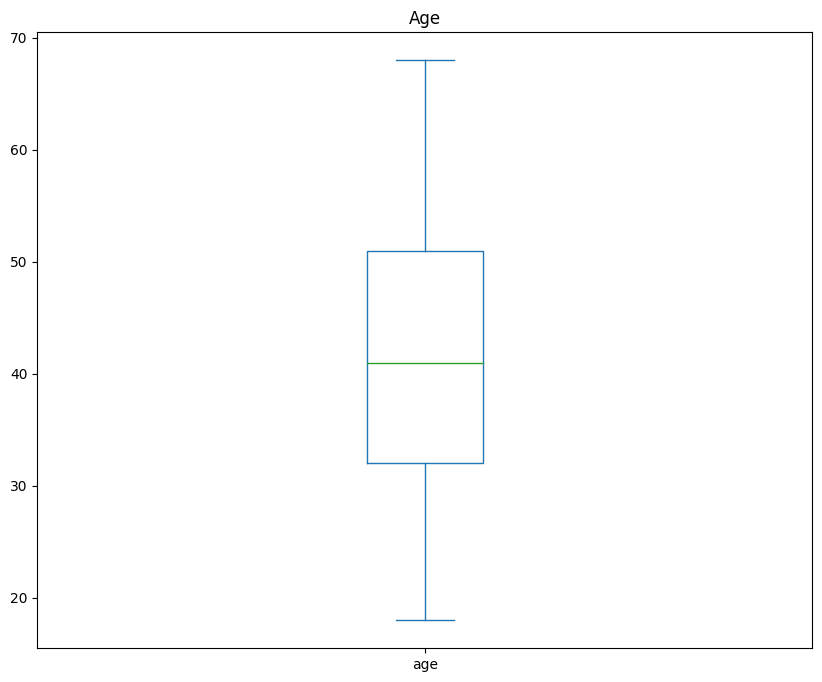

In [ ]:
df_temp['age'].plot(kind='box',figsize=(10,8))
plt.title("Age")
plt.show()

Terdapat Outlier pada Age, kemungkinan terisi nya Age dengan 3 angka makan, dapat dihilangkan outlier, tetapi pada case ini akan di buang digit terakhir pada angka akibat kemungkinan typo pada pengisian

#Import Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df_temp.to_csv('/content/gdrive/MyDrive/DatasetFrame/Club Member Info/df_temp.csv', index='False')

from google.colab import files
files.download('/content/gdrive/MyDrive/DatasetFrame/Club Member Info/df_temp.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/gdrive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualization

## Age Distribution Histogram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


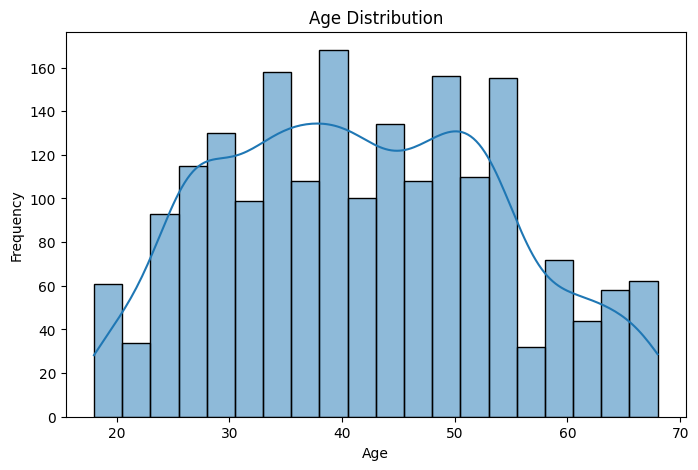

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df_temp['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- range member terbanyak pada usia 40 - 50
- Terbanyak pada Age 40 = 160

##Marital Status Distribution Bar Chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


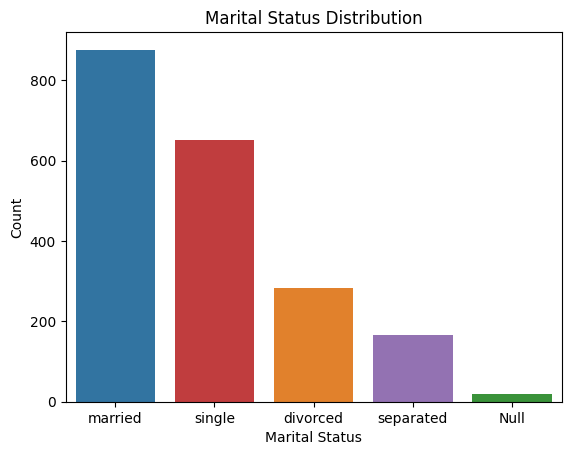

In [ ]:
sns.countplot(df_temp, x="martial_status", hue="martial_status", stat="count",order=df_temp['martial_status'].value_counts().index)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
plt.show()

- ternyata Married status lebih banyak dibandingkan Single

##Job Title Frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


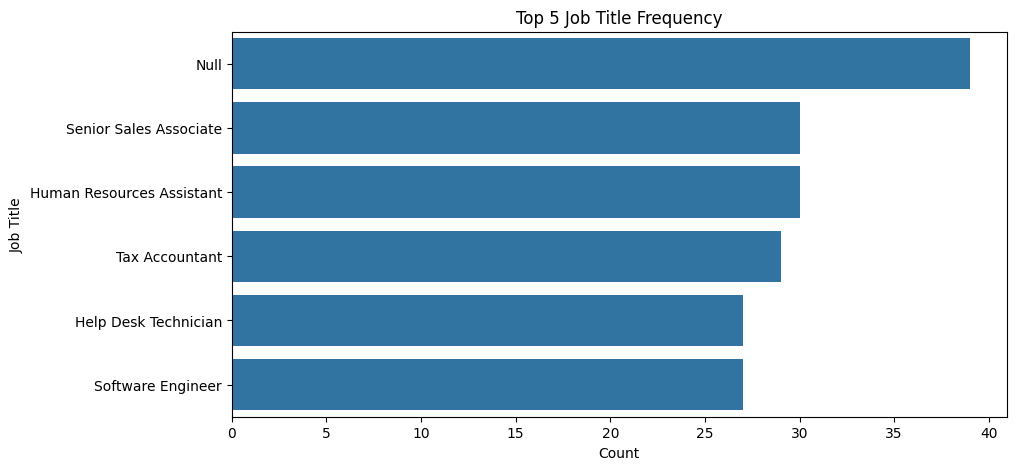

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='job_title', data=df_temp, order=df_temp['job_title'].value_counts().iloc[:6].index)
plt.title('Top 5 Job Title Frequency')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- top 5 Job yang jadi member Gym
- ternyata banyak white collar on desk yang gym kemungkinan karena sehari capek duduk
- banyak terdapat null karena tidak di isi, mandatory pengisian harus di perketat lagi

##Membership Date Trend

In [ ]:
# Convert the membership_date column to datetime format
df_temp['membership_date'] = pd.to_datetime(df_temp['membership_date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#For Current years on dataset
df_2022 = df_temp[df_temp['membership_date'].dt.year == 2022]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set the membership_date as the index
df_2022.set_index('membership_date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Resample the data by month and count the number of members per month
membership_trends = df_2022.resample('M').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ensure the y-axis shows integer values
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


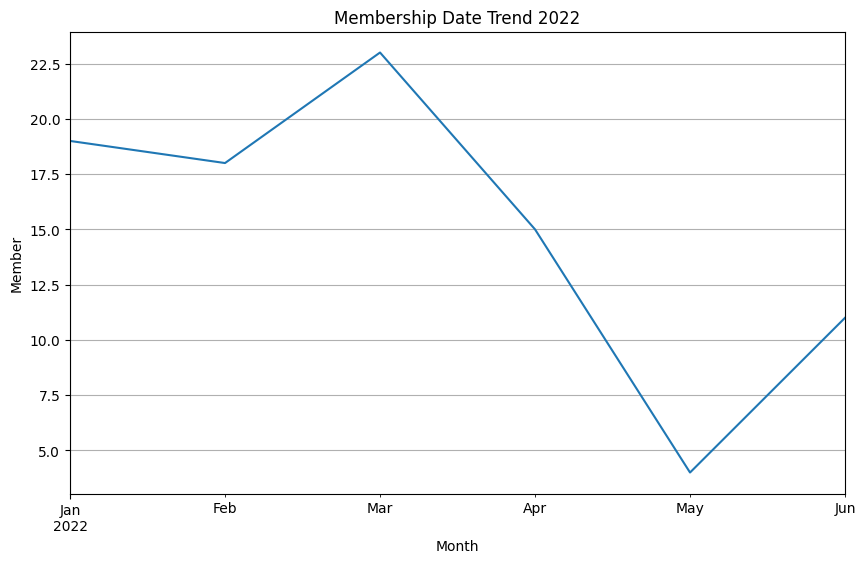

In [ ]:
membership_trends.plot(kind='line', figsize=(10, 6))
plt.title('Membership Date Trend 2022')
plt.xlabel('Month')
plt.ylabel('Member')
#plt.legend(['Membership Trends'])
plt.grid(True)

##Geographic Distribution (Take the city from each adress)

In [ ]:
# Extract the city from the full_address column
df_temp['city'] = df_temp['full_address'].apply(lambda x: x.split(',')[1].strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-1fa9aeec14e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')


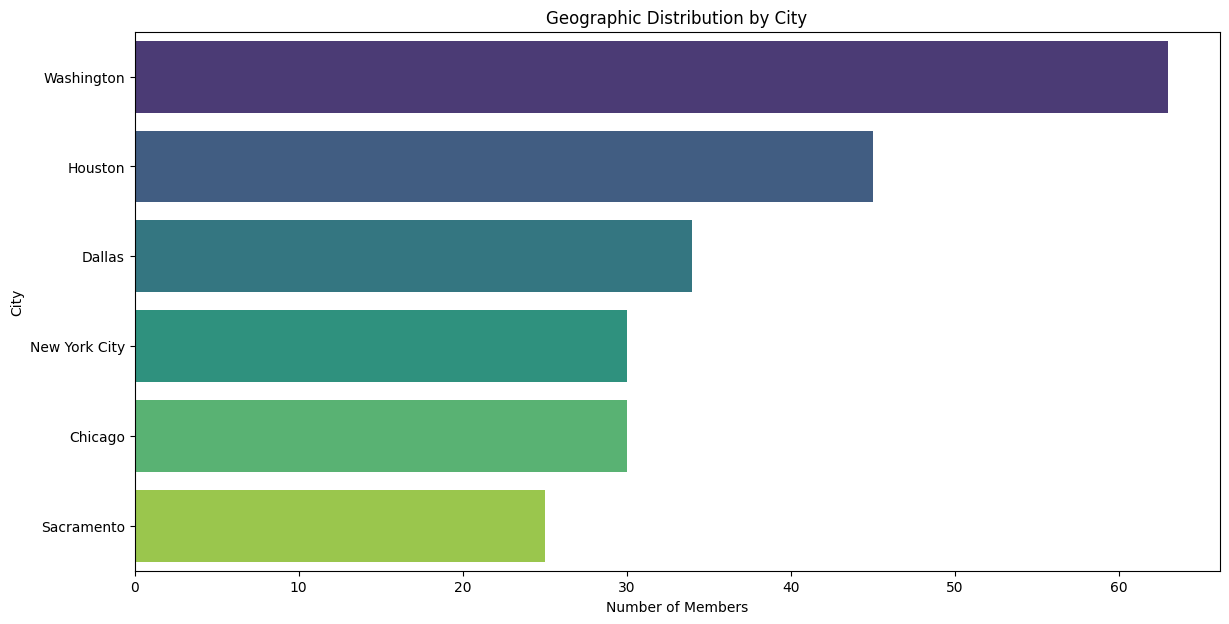

In [ ]:
plt.figure(figsize=(14, 7))
city_counts = df_temp['city'].value_counts().iloc[:6]
sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')
plt.title('Geographic Distribution by City')
plt.xlabel('Number of Members')
plt.ylabel('City')
plt.show()

##Email Domain Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Features Engineering

##Age Group

In [ ]:
df_temp['age_group'] = pd.cut(df_temp['age'], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Membership Duration

In [ ]:
#durasi max dari paling current membership_date
df_temp['membership_duration'] = (df_temp['membership_date'].max() - df_temp['membership_date']).dt.days

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#durasi sampai hari ini dari
df['membership_duration'] = (pd.Timestamp('now') - df['membership_date']).dt.days

##City

In [ ]:
df_temp['city'] = df_temp['full_address'].apply(lambda x: x.split(',')[1].strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##State

In [ ]:
df_temp['State'] = df_temp['full_address'].apply(lambda x: x.split(',')[2].strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Membership Month

In [ ]:
df_temp['membership_month'] = df_temp['membership_date'].dt.month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Membership Year

In [ ]:
df_temp['membership_year'] = df_temp['membership_date'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Is Married

In [ ]:
df_temp['is_married'] = df_temp['martial_status'].apply(lambda x: 1 if x.lower() == 'married' else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Import

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df_temp.to_csv('/content/gdrive/MyDrive/DatasetFrame/Club Member Info/df_temp_fe.csv', index='False')

from google.colab import files
files.download('/content/gdrive/MyDrive/DatasetFrame/Club Member Info/df_temp_fe.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>